# Different Expression Analysis

An important task of bulk rna-seq analysis is the different expression , which we can perform with Pyomic. For different expression analysis, Pyomic change the `gene_id` to `gene_name` of matrix first. When our dataset existed the batch effect, we can use the SizeFactors of DEseq2 to normalize it, and use `t-test` of `wilcoxon` to calculate the p-value of genes. Here we demonstrate this pipeline with a matrix from `featureCounts`. The same pipeline would generally be used to analyze any collection of RNA-seq tasks. 

In [1]:
import Pyomic
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

## Geneset Download

When we need to convert a gene id, we need to prepare a mapping pair file. Here we have pre-processed 6 genome gtf files and generated mapping pairs including `T2T-CHM13`, `GRCh38`, `GRCh37`, `GRCm39`, `danRer7`, and `danRer11`. If you need to convert other id_mapping, you can generate your own mapping using gtf Place the files in the `genesets` directory.

In [15]:
Pyomic.utils.download_geneid_annotation_pair()

......Geneid Annotation Pair download start: pair_GRCm39
......Loading dataset from genesets/pair_GRCm39.tsv
......Geneid Annotation Pair download start: pair_T2TCHM13
......Loading dataset from genesets/pair_T2TCHM13.tsv
......Geneid Annotation Pair download start: pair_GRCh38
......Loading dataset from genesets/pair_GRCh38.tsv
......Geneid Annotation Pair download start: pair_GRCh37
......Loading dataset from genesets/pair_GRCh37.tsv
......Geneid Annotation Pair download start: pair_danRer11
......Loading dataset from genesets/pair_danRer11.tsv
......Geneid Annotation Pair download start: pair_danRer7
......Loading dataset from genesets/pair_danRer7.tsv
......Geneid Annotation Pair download finished!


In [2]:
data=pd.read_csv('/Users/fernandozeng/Desktop/mouse_skin/raw_data/counts.txt',index_col=0,sep='\t',header=1)
data.columns=[i.split('/')[-1].replace('.bam','') for i in data.columns]
data.head()

1--1  1--2  2--1  2--2  3--1  3--2  4--1  4--2  4-3  4-4  \
Geneid                                                                         
ENSMUSG00000102628     0     0     0     0     5     0     0     0    0    0   
ENSMUSG00000100595     0     0     0     0     0     0     0     0    0    0   
ENSMUSG00000097426     5     0     0     0     0     0     0     1    0    0   
ENSMUSG00000104478     0     0     0     0     0     0     0     0    0    0   
ENSMUSG00000104385     0     0     0     0     0     0     0     0    0    0   

                    Blank-1  Blank-2  
Geneid                                
ENSMUSG00000102628        0        9  
ENSMUSG00000100595        0        0  
ENSMUSG00000097426        0        0  
ENSMUSG00000104478        0        0  
ENSMUSG00000104385        0        0

In [6]:
data=Pyomic.bulk.Matrix_ID_mapping(data,'genesets/pair_GRCm39.tsv')
data.head()

1--1  1--2  2--1  2--2  3--1  3--2  4--1  4--2  4-3  4-4  Blank-1  \
Olfr117       0     0     0     0     0     0     0     0    0    0        0   
Gm47502       0     0     0     0     0     0     0     0    0    0        0   
Gm34907       4     0     0     5     3     0     4     8    4    2        7   
Mir467a-7     0     0     0     0     0     0     0     0    0    0        0   
Erdr1       113    81   195    82   238   193   237   779  145  221       81   

           Blank-2  
Olfr117          0  
Gm47502          0  
Gm34907          0  
Mir467a-7        0  
Erdr1           71

In [7]:
dds=Pyomic.bulk.pyDEseq(data)
dds.drop_duplicates_index()
dds.normalize()
result=dds.deg_analysis(['4-3','4-4'],['1--1','1--2'],method='ttest')
result.head()

pvalue    qvalue  FoldChange  -log(pvalue)  -log(qvalue)  \
Olfr117         NaN  0.000000    1.000000           NaN           inf   
Gm47502         NaN  0.000000    1.000000           NaN           inf   
Gm34907    0.682047  0.749407    1.473497      0.166185      0.125282   
Mir467a-7       NaN  0.000000    1.000000           NaN           inf   
Erdr1      0.169462  0.267032    1.953064      0.770927      0.573436   

             BaseMean  log2(BaseMean)    log2FC  abs(log2FC)      size     sig  
Olfr117      0.000000            -inf  0.000000     0.000000  0.100000     sig  
Gm47502      0.000000            -inf  0.000000     0.000000  0.100000     sig  
Gm34907      4.933468        1.302602  0.559244     0.559244  0.147350  normal  
Mir467a-7    0.000000            -inf  0.000000     0.000000  0.100000     sig  
Erdr1      275.910171        7.108055  0.965739     0.965739  0.195306  normal

In [8]:
dds=Pyomic.bulk.pyDEseq(data)
dds.drop_duplicates_index()
dds.normalize()
result=dds.deg_analysis(['4-3','4-4'],['1--1','1--2'],method='ttest')
result.head()

pvalue    qvalue  FoldChange  -log(pvalue)  -log(qvalue)  \
Olfr117         NaN  0.000000    1.000000           NaN           inf   
Gm47502         NaN  0.000000    1.000000           NaN           inf   
Gm34907    0.682047  0.749407    1.473497      0.166185      0.125282   
Mir467a-7       NaN  0.000000    1.000000           NaN           inf   
Erdr1      0.169462  0.267032    1.953064      0.770927      0.573436   

             BaseMean  log2(BaseMean)    log2FC  abs(log2FC)      size     sig  
Olfr117      0.000000            -inf  0.000000     0.000000  0.100000     sig  
Gm47502      0.000000            -inf  0.000000     0.000000  0.100000     sig  
Gm34907      4.933468        1.302602  0.559244     0.559244  0.147350  normal  
Mir467a-7    0.000000            -inf  0.000000     0.000000  0.100000     sig  
Erdr1      275.910171        7.108055  0.965739     0.965739  0.195306  normal

In [9]:
print(result.shape)
result=result.loc[result['log2(BaseMean)']>1]
print(result.shape)

(54504, 11)
(21277, 11)


... Fold change threshold: 1.5700012162801356


<AxesSubplot: title={'center': 'DEG Analysis'}, xlabel='$log_{2}FC$', ylabel='$-log_{10}(qvalue)$'>

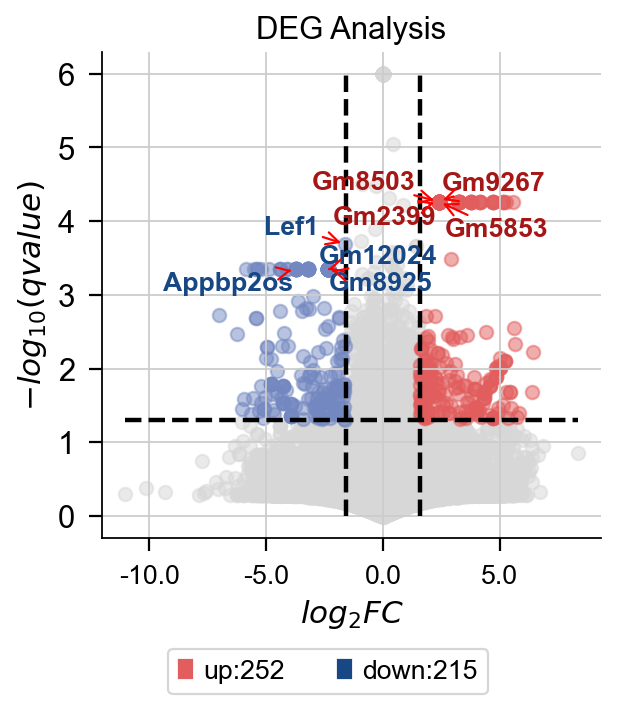

In [10]:
dds.foldchange_set()
dds.plot_volcano(title='DEG Analysis',plot_genes_num=8,plot_genes_fontsize=12,)

In [ ]:
Pyomic.utils.download_pathway_database()

In [12]:
import pandas as pd
pathway_dict=Pyomic.utils.geneset_prepare('genesets/WikiPathways_2019_Mouse.txt',organism='Mouse')

In [13]:
enr=Pyomic.bulk.geneset_enrichment(gene_list=dds.result.loc[dds.result['sig']!='normal'].index.tolist(),
                                  pathways_dict=pathway_dict,pvalue_type='auto',
                                  organism='mouse')

<AxesSubplot: title={'center': 'Wiki Pathway enrichment'}, xlabel='Fractions of genes'>

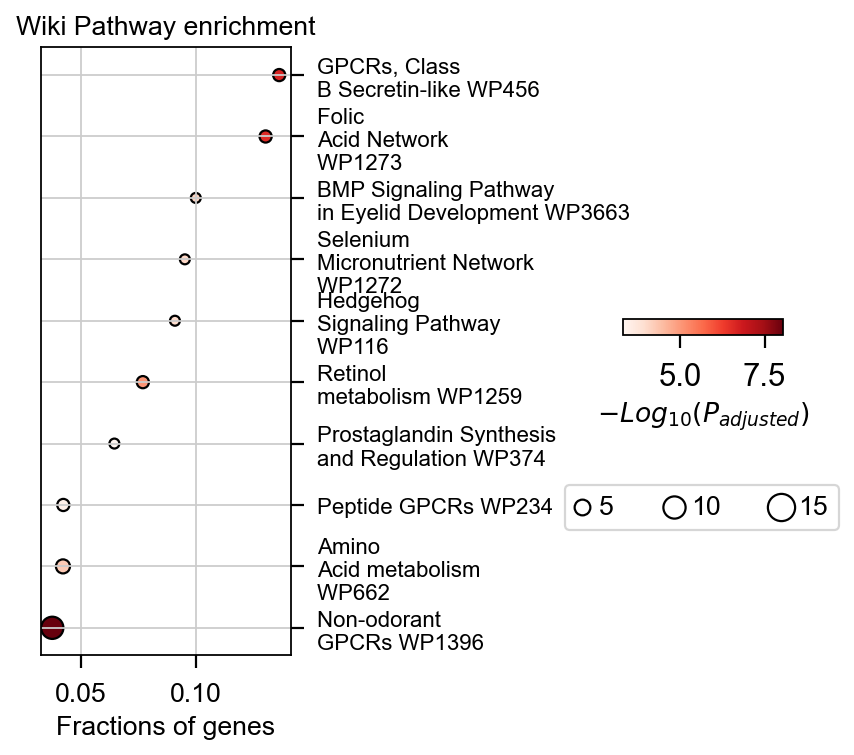

In [14]:
Pyomic.bulk.geneset_plot(enr,figsize=(2,5),fig_title='Wiki Pathway enrichment',
                        cmap='Reds')